In [69]:
import numpy as np
from tools import *
from fitters import *
from projectors import *
import seaborn as sns
set_seaborn()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
def test_run(noise=0, beta=0, dim=6, e_s=np.array([-0.8, -0.15, 1.5]), a_s=np.array([1.0, 0.2, 0.01]), dt=0.1, sys_rank=-1, method='', iteration=0):

    if sys_rank != -1:
        e_s = e_s[:sys_rank]
        a_s = a_s[:sys_rank]


    time = np.arange(0,3,dt)

    X_series, Y_series, _, _ = build_exp_series(
        a_s, e_s, noise=noise, time =time)

    if method == 'Eig':
         P_series, theta, A, c = eig_companion_Cshift(  X_series, dim, beta=beta)

    elif method == 'Window-Eig':
        P_series, theta = eig_companion_Cshift_time(
            X_series, dim, beta=beta)

    Y_series = Y_series[dim:]
    P_series = solve_scale_shift(P_series, Y_series)

    err = mean_square_error(Y_series, P_series)  

    result = {
        'Time-X': time,
        'Time-Y': time[dim:],
        'Time-Filter': np.linspace(-dim, 0, 1),
        'Theta (REAL)': theta.real,
        'Theta (IMAG)': theta.imag,
        'X_series': X_series,
        'Y_series': Y_series,
        'P_series': P_series,
        'MSE': err
    }

    return result


In [71]:
noises = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
params = {
    'noise': noises,
    'beta': [1e-10],
    'method':  ['Eig', 'Window-Eig'],
    # 'dt': [0.1, 0.05],
    'sys_rank': [3],
    'e_s': np.random.uniform(-1, 1, size=(5, 11)),
    'a_s': np.random.uniform(-1, 1, size=(5, 11)),
    'iteration': np.arange(100),
}
# print(params['a_s'])
# print(params['e_s'])
results = param_runner(test_run, params)
# plot_dataframe(results, 'X_series',  aggregate='error', legend=False)
# plot_dataframe(results, 'X_series',  line_cols=['noise'])
# plot_dataframe(results, ['P_series', 'Y_series'], x_col='Time-Y',
#                title_cols=['method', 'noise'], val_styles=[{}, ['*']], legend=False)
# plot_dataframe(results, 'Theta (REAL)',  title_cols=[
#                'method', 'noise'], legend=False)
# plot_dataframe(results, 'Eig Vec (IMAG)',  title_cols=['method', 'noise'], legend=False)
# plot_dataframe(results, 'Eig Vals (MAG)', title_cols=[ 'method', 'noise'], legend=False,  val_styles=[['.-']])
# plot_dataframe(results, 'Spec X@XT', line_cols=['e_s', 'a_s'], title_cols=['sys_rank', 'beta', 'noise'], legend=False,  val_styles=[['.-']])


[[<matplotlib.axis.XTick at 0x12de9d430>,
 None,
 None]

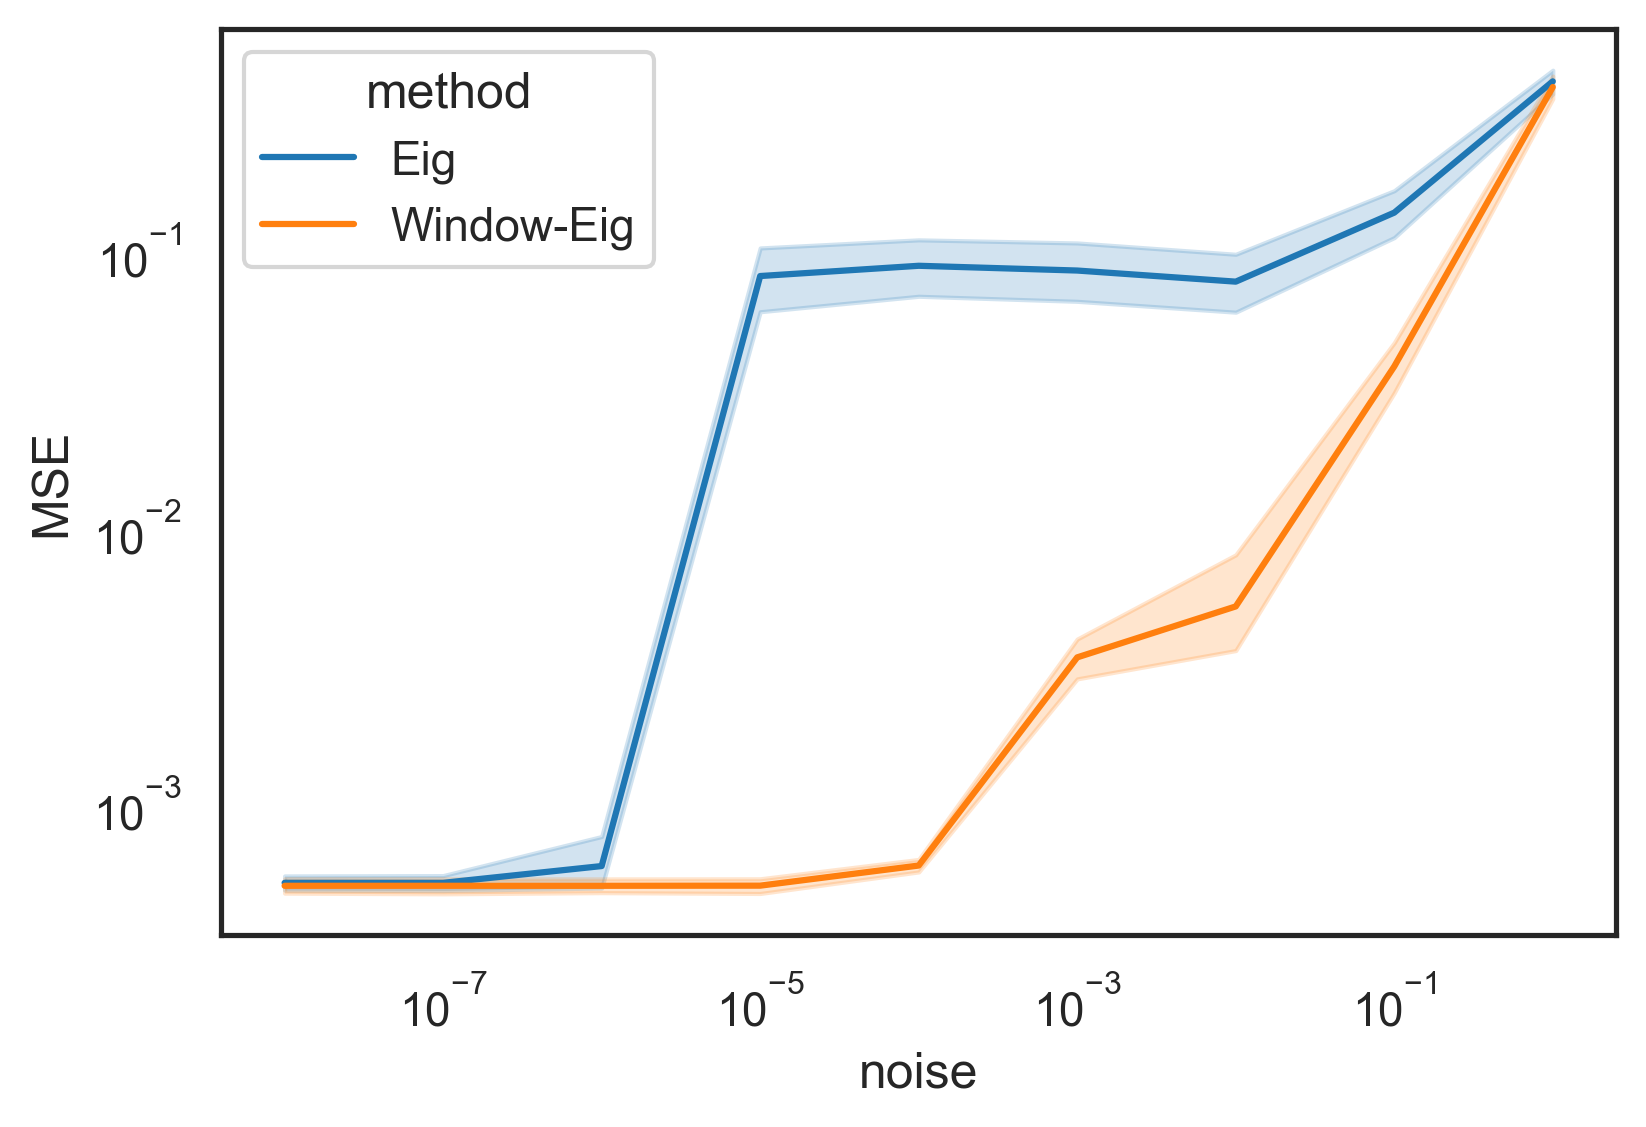

In [72]:
lp = sns.lineplot(x ='noise', y ='MSE', hue='method', markers=True, data=results)
lp.set(xticks=noises,xscale="log",yscale="log")